# Sales and Satisfaction (Missing)

This notebook aims to explore a data science approach with the Sales and Satisfaction Dataset. We will specifically focus on the version of the data with missing data, as well as discussing the effects of missing data on the EDA and model results.

This will eventually contribute to a larger comparison between the non-missing and missing versions of the data.

You can find the original dataset on [Kaggle](https://www.kaggle.com/datasets/matinmahmoudi/sales-and-satisfaction).

# Library Imports

In [53]:
import pandas as pd
import numpy as np

# hypothesis testing
from scipy.stats import ttest_rel
import statsmodels.formula.api as smf

# visual
import seaborn as sns
import matplotlib.pyplot as plt

# model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, precision_recall_fscore_support
from sklearn import tree

# Data Loading

In [2]:
df = pd.read_csv("Sales_with_NaNs_v1.3.csv")
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


# Initial Inspection

In [3]:
# print dimensions
df.shape

(10000, 7)

In [4]:
# print rows and columns
print(f"Number of Rows (Entries): {df.shape[0]}")
print(f"Number of Columns (Variables): {df.shape[1]}")

Number of Rows (Entries): 10000
Number of Columns (Variables): 7


In [5]:
# print the variable names
df.columns

Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')

In [6]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [7]:
# summary statistics
df.describe(include = 'all')

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
count,8599,8034,8478.000000,9233.000000,8330.000000,8360.000000,9195
unique,2,3,NaN,NaN,NaN,NaN,2
top,Control,Low Value,NaN,NaN,NaN,NaN,Yes
freq,4300,2699,NaN,NaN,NaN,NaN,4667
mean,NaN,NaN,203.716998,280.457952,70.252076,73.872593,NaN
std,NaN,NaN,55.273059,85.659543,16.957010,18.128351,NaN
min,NaN,NaN,24.852966,32.414352,22.202441,18.224938,NaN
25%,NaN,NaN,166.629232,221.436990,56.365513,59.925030,NaN
50%,NaN,NaN,203.323607,273.129170,69.490898,73.844594,NaN
75%,NaN,NaN,238.809147,332.570108,83.426798,90.044365,NaN


# Notes About Variables/Features

**Group**

- **Description**: Indicates whether the data point belongs to the Control of Treatment group
- **Categories**: `Control`, `Treatment`
- **Additional Notes**: Either binary or categorical

**Customer_Segment**

- **Description**: Categorizes customers based on their value.
- **Categories**: High Value, Medium Value, Low Value
- **Additional Notes**: Categorical Variable

**Sales_Before**

- **Description**: Sales figures before the intervention.
- **Data Type**: Numerical
- **Additional Notes**: Float number

**Sales_After**

- **Description**: Sales figures after the intervention.
- **Data Type**: Numerical
- **Additional Notes**: Float number

**Customer_Satisfaction_Before**

- **Description**: Customer satisfaction scores before the intervention.
- **Data Type**: Numerical
- **Additional Notes**: Float number

**Customer_Satisfaction_After**

- **Description**: Customer satisfaction scores after the intervention.
- **Data Type**: Numerical
- **Additional Notes**: Float number


**Purchase_Made**

- **Description**: Indicates whether a purchase was made after the intervention
- **Categories**: `Yes`, `No`
- **Additional Notes**: Binary Variable

In [8]:
# inspect missing data
df.isna().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [9]:
# missing data in terms of percentage
100 * df.isna().sum() / len(df)

Group                           14.01
Customer_Segment                19.66
Sales_Before                    15.22
Sales_After                      7.67
Customer_Satisfaction_Before    16.70
Customer_Satisfaction_After     16.40
Purchase_Made                    8.05
dtype: float64

For the majority of variables, we see that around 15% of the data is missing.

In [10]:
# check unique values
df.nunique()

Group                              2
Customer_Segment                   3
Sales_Before                    8388
Sales_After                     9143
Customer_Satisfaction_Before    7731
Customer_Satisfaction_After     7033
Purchase_Made                      2
dtype: int64

# EDA

## Numerical Variables

The following variables are numerical: `Sales_Before`, `Sales_After`, `Customer_Satisfaction_Before`, `Customer_Satisfaction_After`.

### Univariate

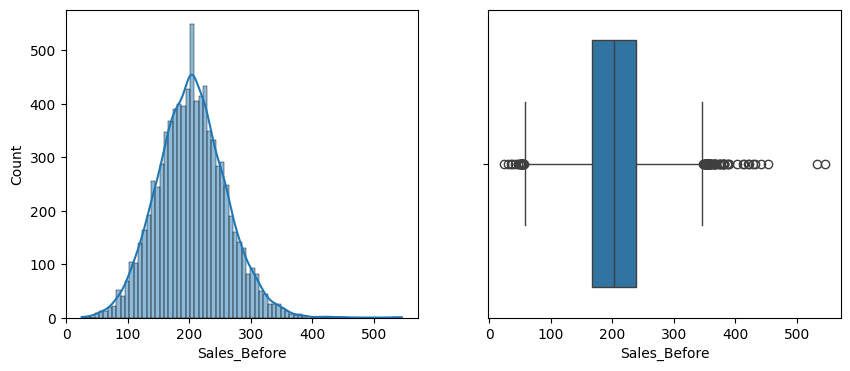

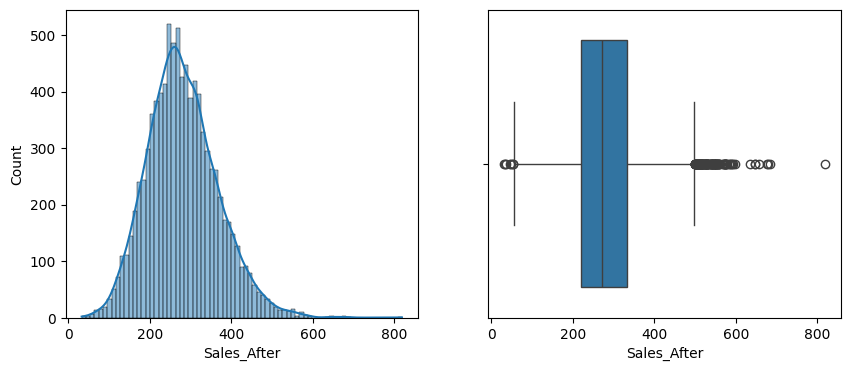

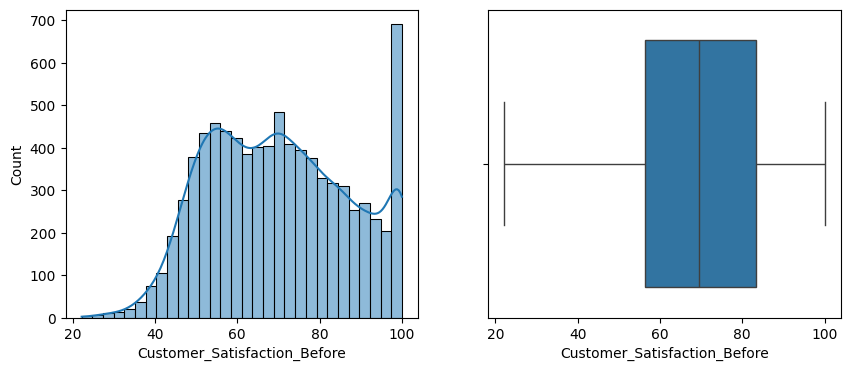

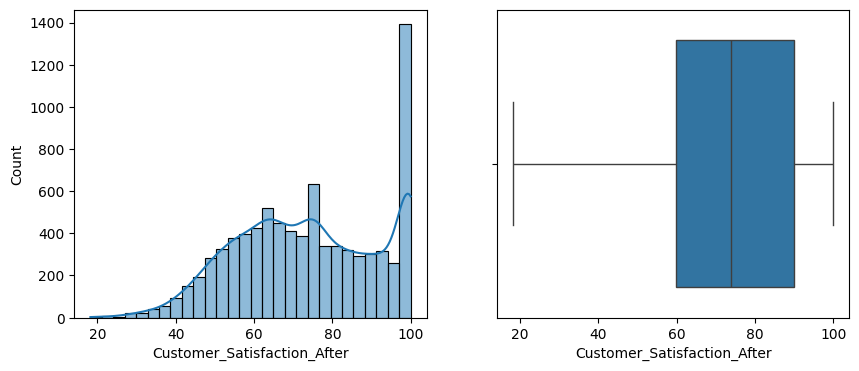

In [11]:
# Histogram and Boxplot
for col in df.select_dtypes(include = ['int64', 'float64']).columns:
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sns.histplot(df[col].dropna(), kde = True, ax = ax[0])
    sns.boxplot(x = df[col], ax = ax[1])
    plt.show()

### Multivariate

<Axes: >

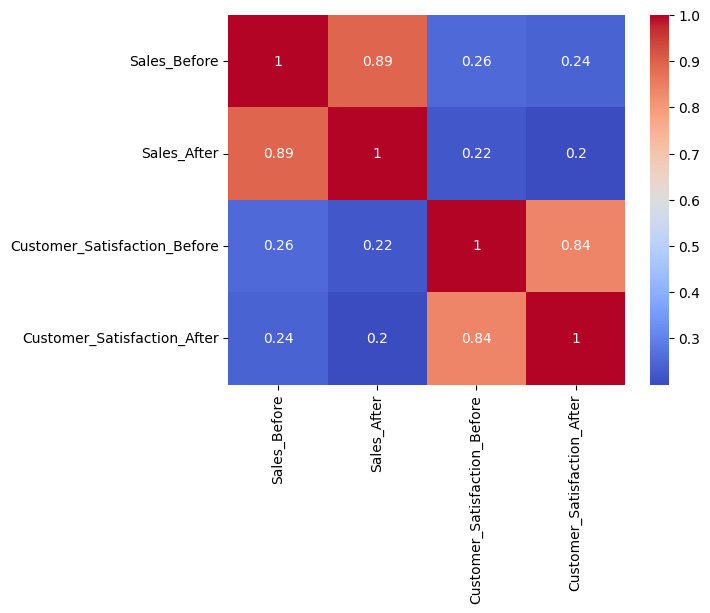

In [12]:
# Heatmap
sns.heatmap(df.select_dtypes(include = ['float64']).corr(), annot = True, cmap = 'coolwarm')

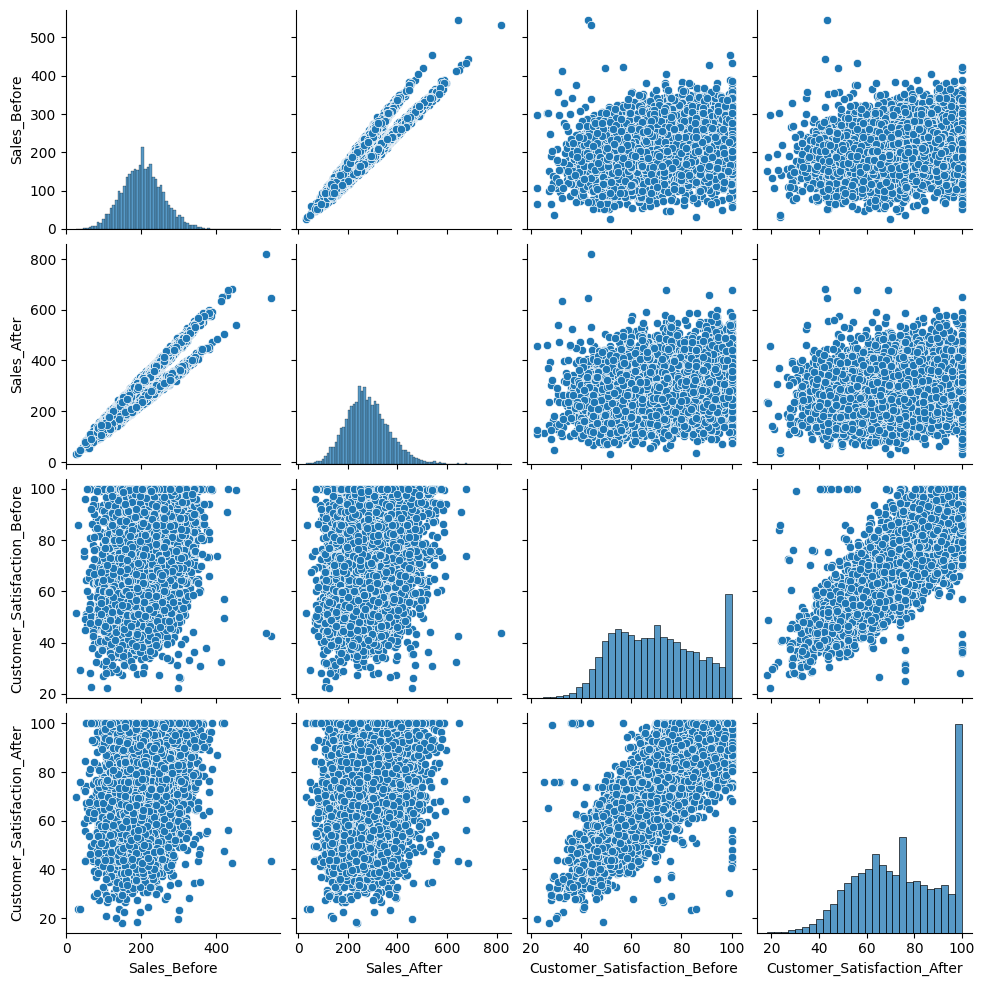

In [13]:
# Pairplot
sns.pairplot(df.select_dtypes(include = ['int64', 'float64']))

**Notes**

- *Sales Before Intervention* and *Sales After Intervenntion* are positively correlated.

- *Customer Satisfaction Before Intervention* and *Customer Satisfaction After Intervention* are positively correlated.

- All other relationships among the numerical variables have weak or no correlation.

## Categorical Variables

The following variables are categorical: `Group`, `Customer_Segment`, `Purchase_Made`.

### Univariate

Group
Control      0.500058
Treatment    0.499942
Name: proportion, dtype: float64


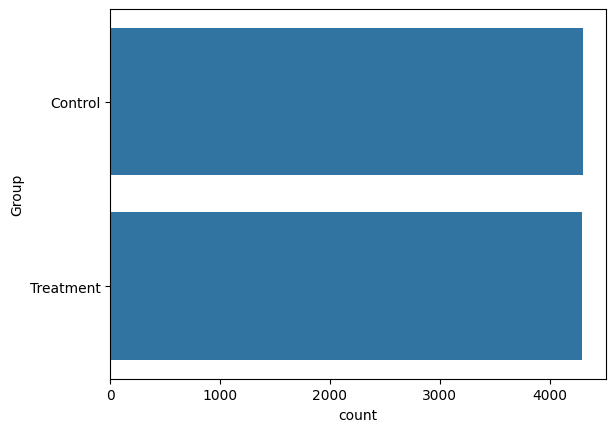

Customer_Segment
Low Value       0.335947
Medium Value    0.335698
High Value      0.328354
Name: proportion, dtype: float64


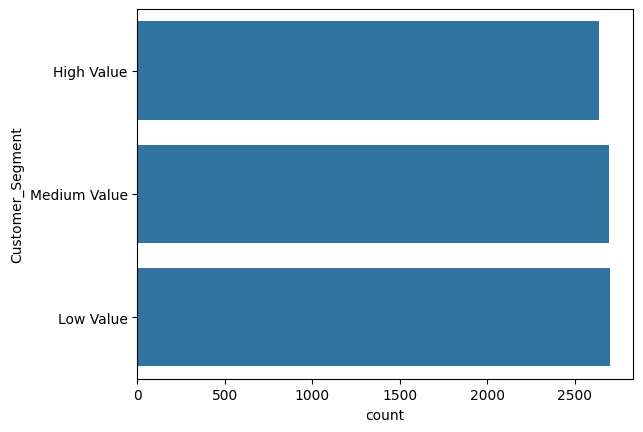

Purchase_Made
Yes    0.507558
No     0.492442
Name: proportion, dtype: float64


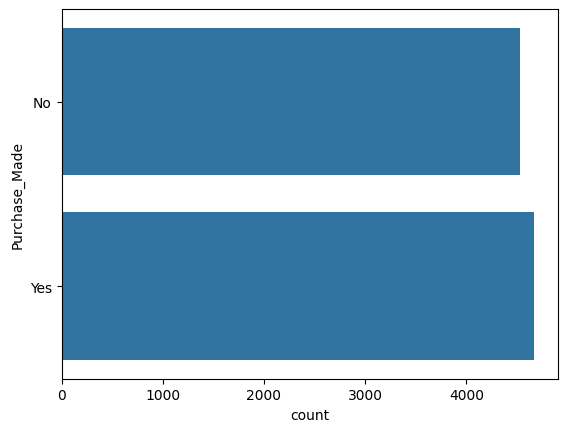

In [14]:
for col in df.select_dtypes(include = ['object', 'category']).columns:
    print(df[col].value_counts(normalize = True).head())
    sns.countplot(y = col, data = df)
    plt.show()

*Notes*:

- Relatively balanced labels for all categorical variables

### Multivariate

In [15]:
# analyze group against customer segment via cross tabulation
pd.crosstab(df['Group'], df['Customer_Segment'], normalize = 'index')

Customer_Segment,High Value,Low Value,Medium Value
Group,,,
Control,0.334977,0.329466,0.335557
Treatment,0.325866,0.338958,0.335176


In [16]:
# analyze group against purchase made via cross tabulation
pd.crosstab(df['Group'], df['Purchase_Made'], normalize = 'index')

Purchase_Made,No,Yes
Group,,
Control,0.493793,0.506207
Treatment,0.487756,0.512244


In [17]:
# # analyze customer segment against purchase made via cross tabulation
# analyze group against purchase made via cross tabulation
pd.crosstab(df['Customer_Segment'], df['Purchase_Made'], normalize = 'index')

Purchase_Made,No,Yes
Customer_Segment,,
High Value,0.492795,0.507205
Low Value,0.487627,0.512373
Medium Value,0.509875,0.490125


## Categorical and Numerical Variable EDA

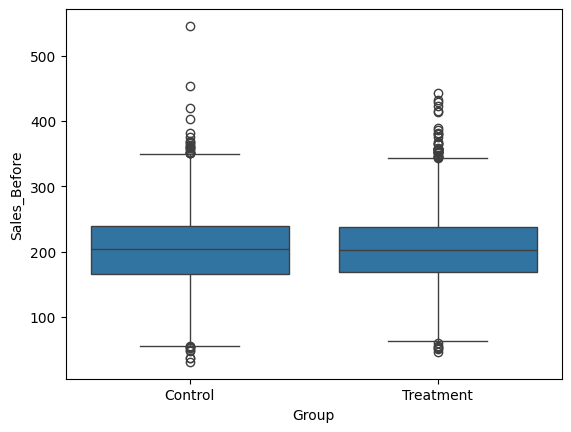

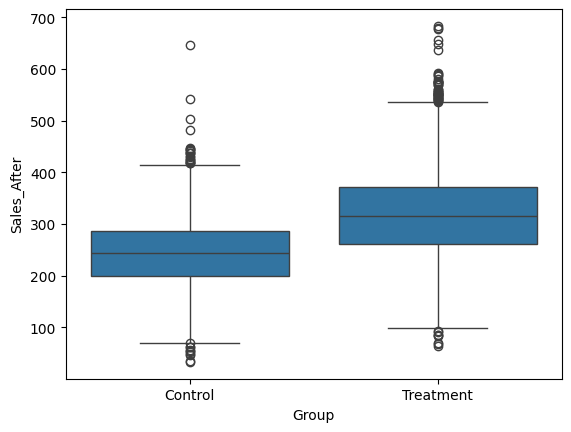

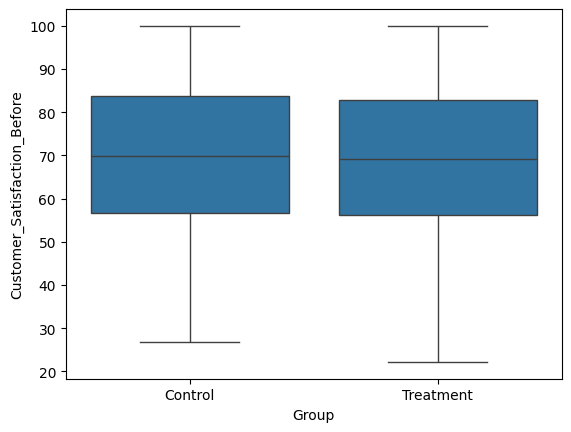

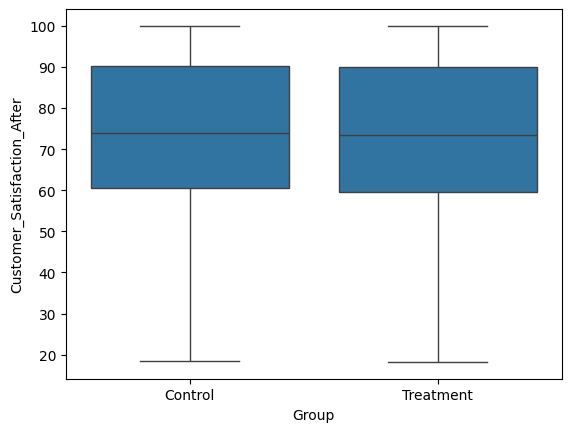

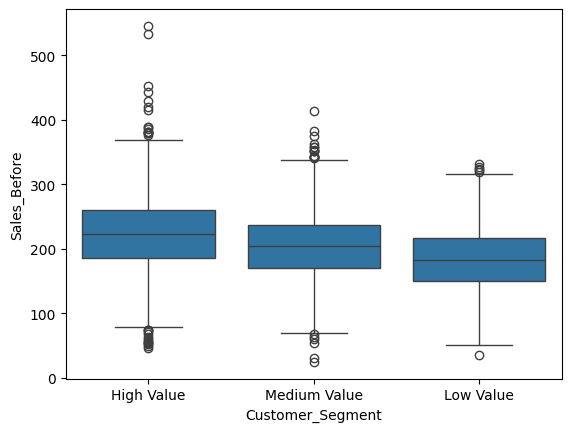

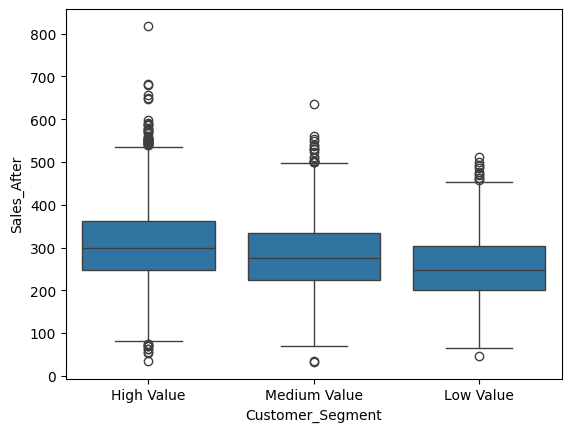

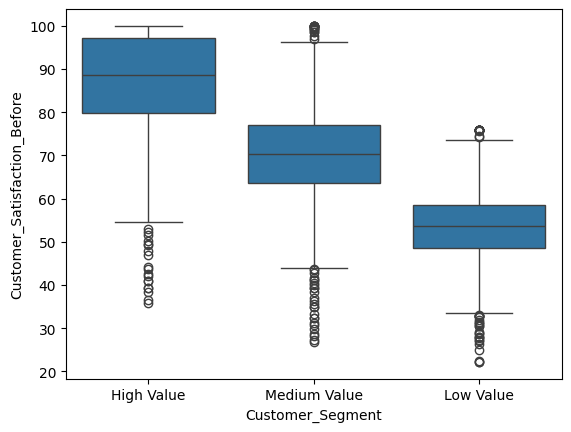

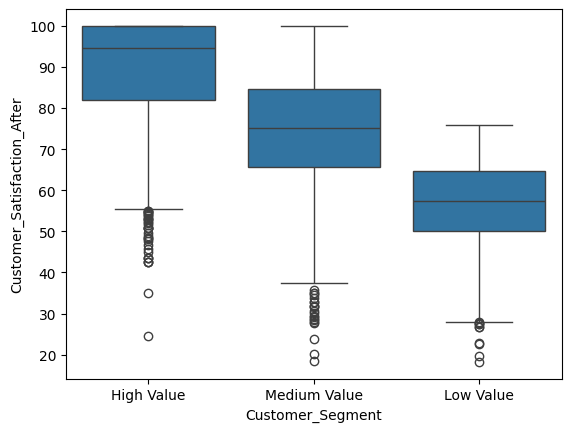

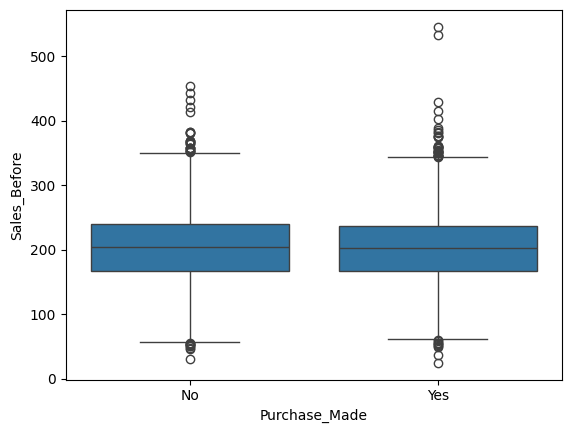

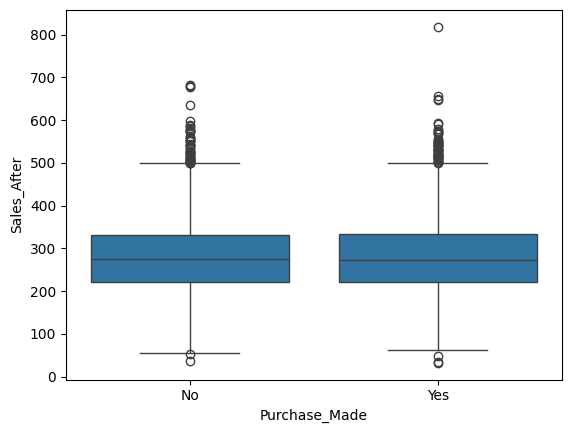

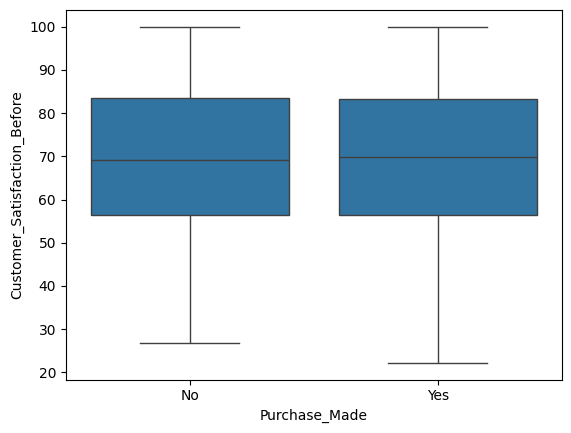

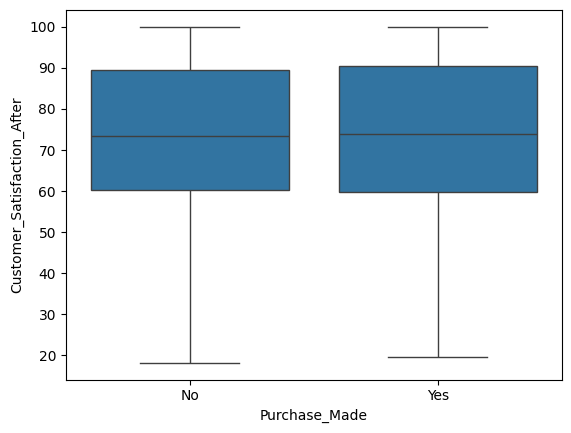

In [18]:
# for each category
for c_col in df.select_dtypes(include = ['object', 'category']).columns:

    # for each numerical variable
    for n_col in df.select_dtypes(include = ['int64', 'float64']).columns:

        # boxplot of numerical variable grouped by category
        sns.boxplot(x = c_col, y = n_col, data = df)
        plt.show()

*Notes*

- For *Sales After Intervention*, distribution of *Treatment* had greater values compared to *Control Group*

- From largest to smallest values, *Customer Segment Value* had different distribution placements depending on the type of segment value for both *Sales* and *Customer Satisfaction*.

# Visualizing Missing Data

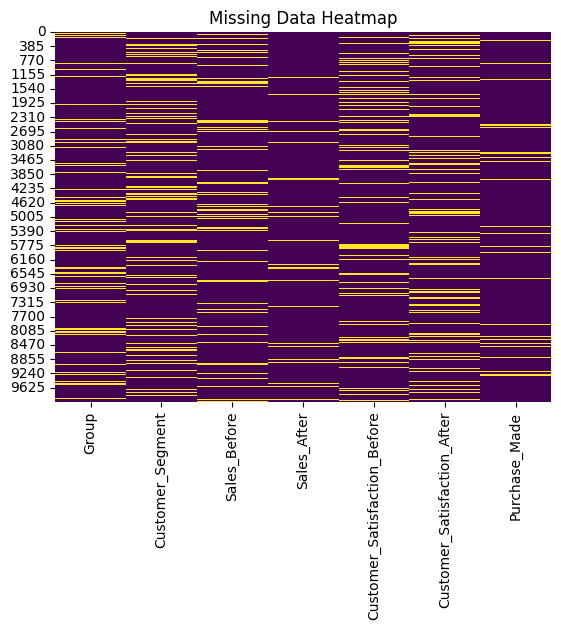

In [19]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [20]:
# creating copies of before and after imputated data for comparison
before = df.copy()
after = df.copy()

In [21]:
# split variables according to type
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns
cat_vars = df.select_dtypes(include = ['object', 'category']).columns

print("Numerical:", list(num_vars))
print("Categorical:", list(cat_vars))

Numerical: ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
Categorical: ['Group', 'Customer_Segment', 'Purchase_Made']


# Imputation

Imputation is the process of creating values for missing data usually based on a central tendency (i.e. mean/median for numerical data, mode for categorical data).

In [22]:
# imputate numerical data based on median
num_imputer = SimpleImputer(strategy = 'median')

# imputate categorical data based on mode
cat_imputer = SimpleImputer(strategy = 'most_frequent')


##### apply imputations ########
after[num_vars] = num_imputer.fit_transform(after[num_vars])
after[cat_vars] = cat_imputer.fit_transform(after[cat_vars])

# EDA: Before and After Imputation

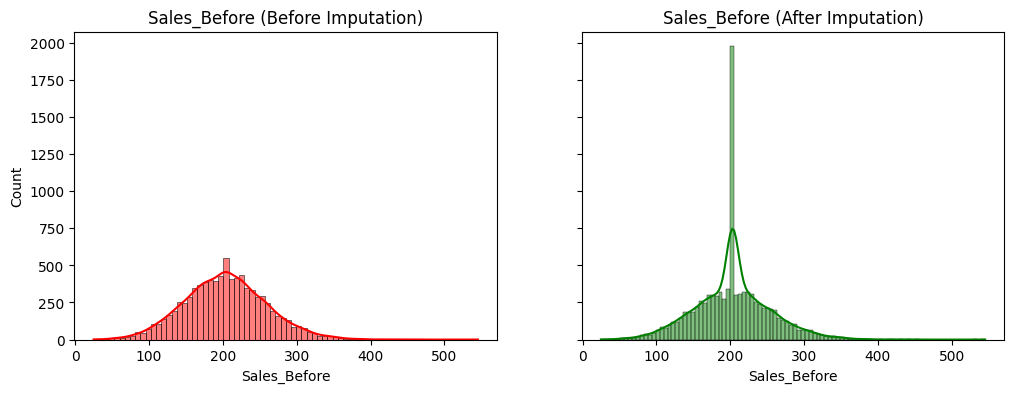

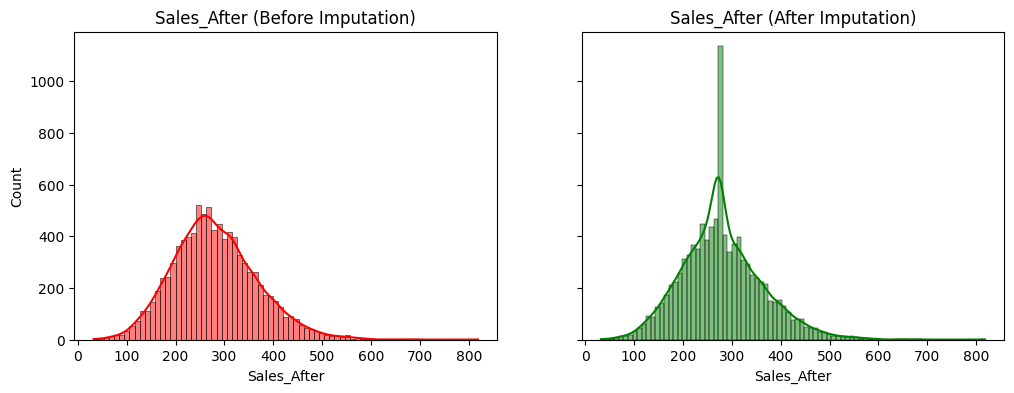

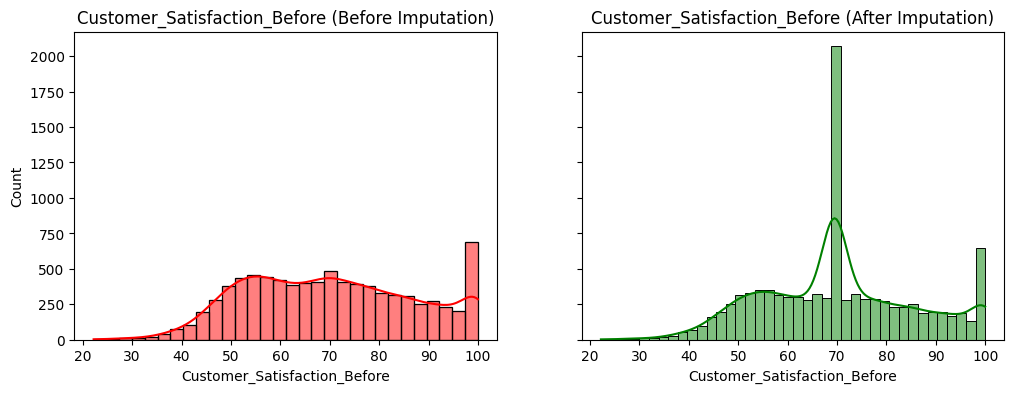

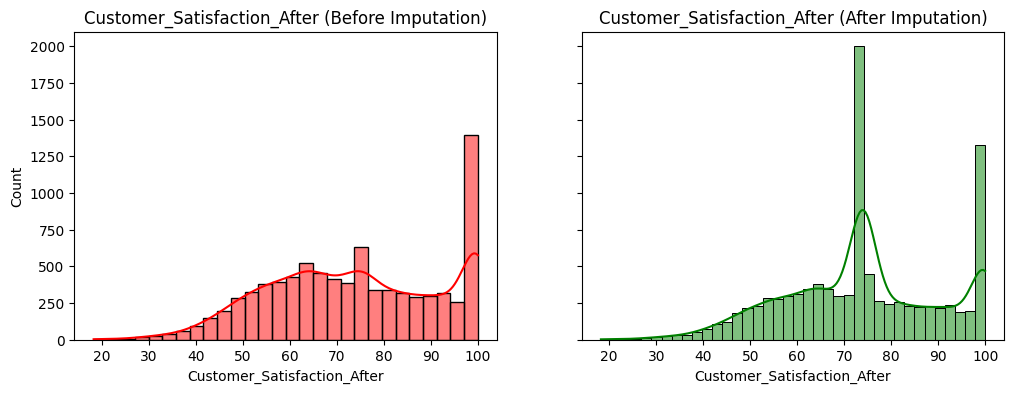

In [23]:
# Numerical distributions
for col in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    sns.histplot(before[col], kde=True, ax=axes[0], color="red")
    axes[0].set_title(f"{col} (Before Imputation)")
    sns.histplot(after[col], kde=True, ax=axes[1], color="green")
    axes[1].set_title(f"{col} (After Imputation)")
    plt.show()

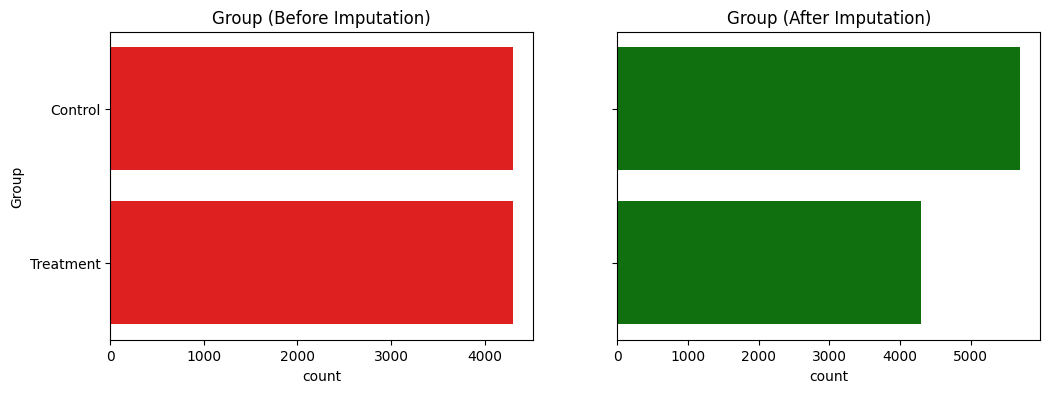

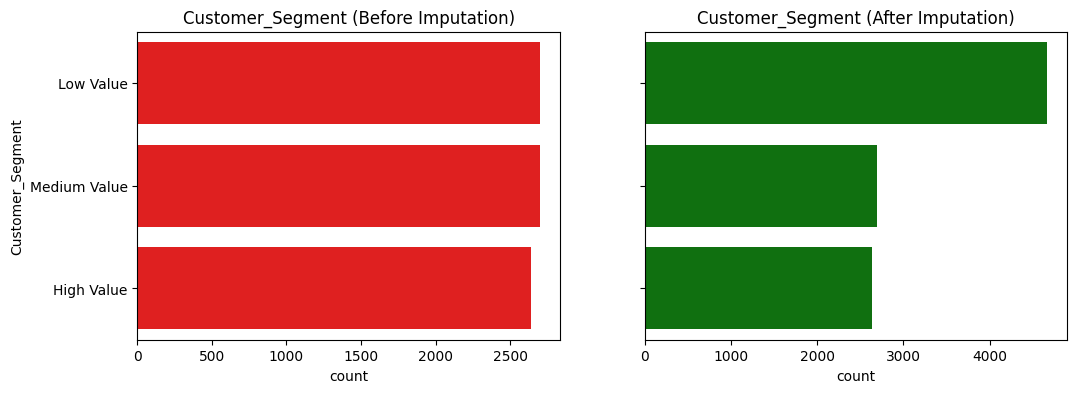

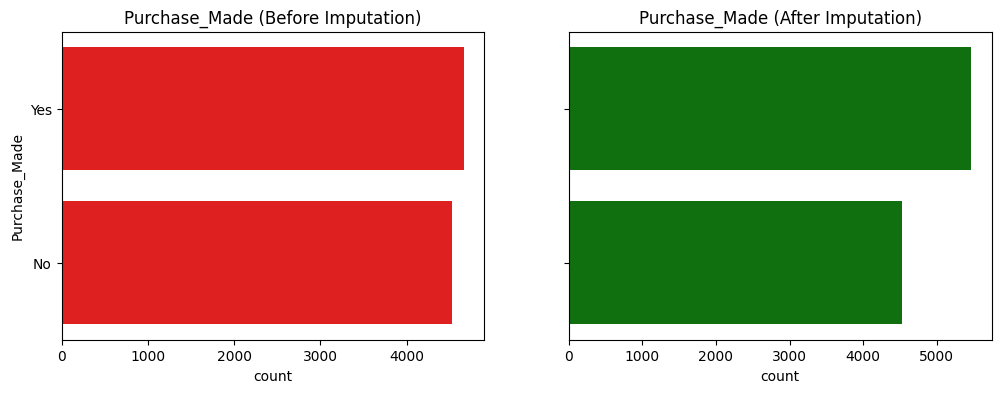

In [24]:
# Categorical counts
for col in cat_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    sns.countplot(y=before[col], ax=axes[0], order=before[col].value_counts().index, color="red")
    axes[0].set_title(f"{col} (Before Imputation)")
    sns.countplot(y=after[col], ax=axes[1], order=after[col].value_counts().index, color="green")
    axes[1].set_title(f"{col} (After Imputation)")
    plt.show()

**Notes**

- Peaks in continuous distribution after imputation by median

- Label imbalance due to imputation by mode

## Summary Table

In [25]:
# before
display(before.describe())

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


In [26]:
# after
display(after.describe())

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.657124,279.895835,70.124960,73.868001
std,50.892991,82.331734,15.478914,16.575142
min,24.852966,32.414352,22.202441,18.224938
25%,173.612027,226.217125,58.786271,62.648973
50%,203.323607,273.129170,69.490898,73.844594
75%,230.990024,326.736168,79.969377,86.013906
max,545.422547,818.219997,100.000000,100.000000


In [27]:
# mean, median, standard deviation
stats_before = before[num_vars].describe().T[['mean', '50%', 'std']]
stats_after = after[num_vars].describe().T[['mean', '50%', 'std']]

# rename
stats_before.rename(columns = {'50%': 'median', 'std': 'std (before)'}, inplace = True)
stats_after.rename(columns = {'50%': 'median', 'std': 'std (after)'}, inplace = True)

# merge together
summary_stats = stats_before.merge(stats_after,
                                   left_index = True,
                                   right_index = True,
                                   suffixes = (" (before)", ' (after)'))

summary_stats.round(2)

,mean (before),median (before),std (before),mean (after),median (after),std (after)
Sales_Before,203.72,203.32,55.27,203.66,203.32,50.89
Sales_After,280.46,273.13,85.66,279.90,273.13,82.33
Customer_Satisfaction_Before,70.25,69.49,16.96,70.12,69.49,15.48
Customer_Satisfaction_After,73.87,73.84,18.13,73.87,73.84,16.58


In [28]:
# % missing before vs after imputation
missing_before = before.isnull().mean() * 100
missing_after = after.isnull().mean() * 100

# summary table of missing entries
summary_missing = pd.DataFrame({
    "Missing % (Before)": missing_before,
    "Missing % (After)": missing_after
}).round(2)

summary_missing

,Missing % (Before),Missing % (After)
Group,14.01,0.0
Customer_Segment,19.66,0.0
Sales_Before,15.22,0.0
Sales_After,7.67,0.0
Customer_Satisfaction_Before,16.70,0.0
Customer_Satisfaction_After,16.40,0.0
Purchase_Made,8.05,0.0


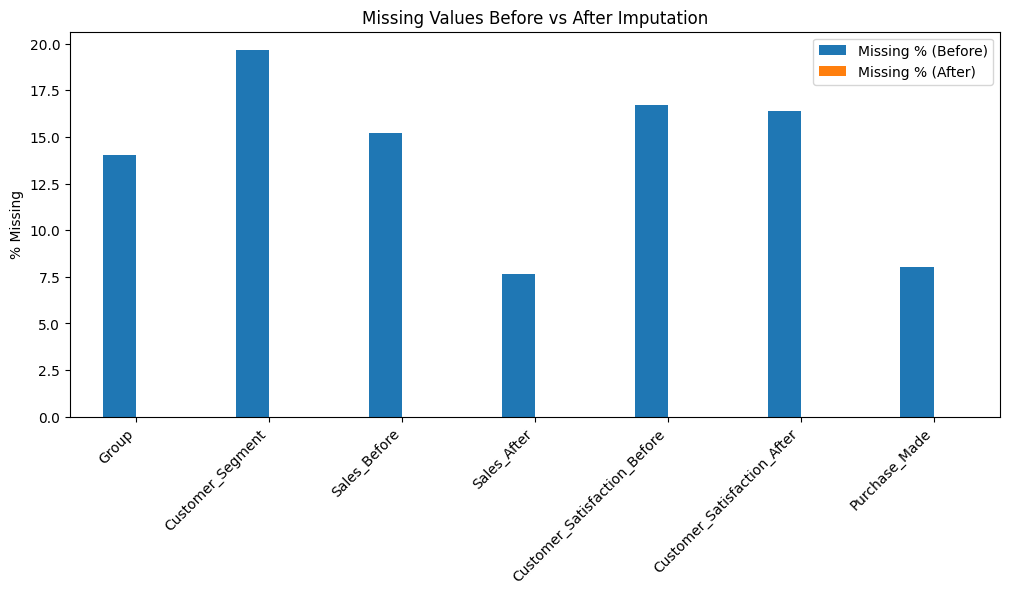

In [29]:
# visualize improvement
summary_missing.plot(kind = 'bar', figsize = (12, 5))
plt.title("Missing Values Before vs After Imputation")
plt.ylabel("% Missing")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Model Building

We will focus on the following as our response variables: `Sales_After`, `Customer_Satisfaction_After`, and `Purchase_Made`.

Our predictors are as follows: `Group`, `Customer_Segment`, `Sales_Before`, `Customer_Satisfaction_Before`.

Due to how the models in scikit-learn cannot handle missing values directly, we will drop the missing subsets. The following models will be used and compared:

1. Linear Regression (Numerical) - Regression

2. Logistic Regression (Categorical) - Classification

3. Random Forest Regressor - Regression 

4. Random Forest Classifier - Classification

In [75]:
# helper functions

###### Data Splitting #######
def splitData(target):

    # drop missing data
    df_dropped = df.dropna(subset = [target])

    # assign predictors and response
    X = df_dropped.drop([target], axis = 1)
    y = df_dropped[target]

    # 80-20 train test split

    # numerical response
    if y.dtype == 'float64':
        X_tr, X_ts, y_tr, y_ts = train_test_split(
            X, y, test_size = 0.2, random_state = 42
        )

    elif y.dtype == 'object':
        X_tr, X_ts, y_tr, y_ts = train_test_split(
            X, y, test_size = 0.2, random_state = 42, stratify = y
        )

    # redefine predictor variables
    num_vars = X.select_dtypes(include = 'float64').columns
    cat_vars = X.select_dtypes(include = 'object').columns

    return X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars


########################## Linear Regression ####################################
def LR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars):

    ################### PREPROCESSING ###########################
    numeric_transformer = Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('scaler', StandardScaler())
        ])

    categorical_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

    # preprocess the data
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, num_vars),
            ('cat', categorical_transformer, cat_vars)
        ]
    )

    # model pipeline
    lr = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # run the model
    lr.fit(X_tr, y_tr)
    y_pred = lr.predict(X_ts)

    # evaluate
    showEval(y_ts, y_pred)

    # scatter plot
    plt.scatter(y_ts, y_pred, alpha = 0.5)
    plt.plot([y_ts.min(), y_ts.max()],
             [y_ts.min(), y_ts.max()],
             'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Regression: Actual vs Predicted")
    plt.show()

    # residual plot
    residuals = y_ts - y_pred
    sns.histplot(residuals, kde = True)
    plt.title("Residuals Distribution")
    plt.xlabel("Residual")
    plt.show()

    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title("Residuals vs Predicted")
    plt.show()

    # get all feature names
    ohe_features = lr.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(cat_vars)
    all_features = list(num_vars)+ list(ohe_features)

    # coefficients
    coef_df = pd.DataFrame({
        "Feature": all_features, 
        "Coefficient": lr.named_steps['regressor'].coef_
    }).sort_values("Coefficient", key = abs, ascending = False)

    display(coef_df)

########################## Logistic Regression ####################################
def LOR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars):

    ################### PREPROCESSING ###########################
    numeric_transformer = Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('scaler', StandardScaler())
        ])

    categorical_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

    # preprocess the data
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, num_vars),
            ('cat', categorical_transformer, cat_vars)
        ]
    )

    # model pipeline
    lor = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter = 1000))
    ])

    # run the model
    lor.fit(X_tr, y_tr)
    y_pred = lor.predict(X_ts)

    # evaluate
    showEval(y_ts, y_pred)

    # confusion matrix
    cm = confusion_matrix(y_ts, y_pred, labels = np.unique(y_ts))
    sns.heatmap(cm, 
                annot = True,
                fmt = 'd', 
                cmap = 'Blues',
                xticklabels=np.unique(y_ts),
                yticklabels=np.unique(y_ts))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Feature names after preprocessing
    ohe_features = lor.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(cat_vars)
    all_features = list(num_vars) + list(ohe_features)

    # coefficients
    coef = lor.named_steps['classifier'].coef_.ravel()
    classes = lor.named_steps['classifier'].classes_

    coef_df_class = pd.DataFrame({
        'Feature': all_features,
        'Coefficient': coef
    })
    
    display(coef_df_class)

########################## Random Forest Regressor ####################################
def RFR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars):

    ################### PREPROCESSING ###########################
    numeric_transformer = Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('scaler', StandardScaler())
        ])

    categorical_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

    # preprocess the data
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, num_vars),
            ('cat', categorical_transformer, cat_vars)
        ]
    )

    # create model
    rfr = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators = 100,
                                             random_state = 42))
    ])

    # fit model
    rfr.fit(X_tr, y_tr)

    # get predictions
    y_pred = rfr.predict(X_ts)

    # evaluate
    showEval(y_ts, y_pred)

    # get all feature names
    ohe_features = rfr.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(cat_vars)
    all_features = list(num_vars)+ list(ohe_features)

    # coefficients
    imp_df = pd.DataFrame({
        "Feature": all_features, 
        "Importance": rfr.named_steps['regressor'].feature_importances_
    }).sort_values("Importance", key = abs, ascending = False)

    display(imp_df)

    # Visualize feature importance
    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
    plt.title("Random Forest Feature Importance")
    plt.show()

########################## Random Forest Classifier ####################################
def RFC(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars):

    ################### PREPROCESSING ###########################
    numeric_transformer = Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'median')),
            ('scaler', StandardScaler())
        ])

    categorical_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

    # preprocess the data
    preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, num_vars),
            ('cat', categorical_transformer, cat_vars)
        ]
    )

    # create model
    rfc = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state = 42))
    ])

    # fit model
    rfc.fit(X_tr, y_tr)

    # get predictions
    y_pred = rfc.predict(X_ts)

    # evaluate
    showEval(y_ts, y_pred)

    # confusion matrix
    cm = confusion_matrix(y_ts, y_pred, labels = np.unique(y_ts))
    sns.heatmap(cm, 
                annot = True,
                fmt = 'd', 
                cmap = 'Blues',
                xticklabels=np.unique(y_ts),
                yticklabels=np.unique(y_ts))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # feature importance
    importances = rfc.named_steps['classifier'].feature_importances_

    # get feature names after preprocessing
    ohe_features = rfc.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(cat_vars)
    all_features = list(num_vars) + list(ohe_features)

    feat_imp = pd.DataFrame({"Feature": all_features,
                             'Importance': importances})
    feat_imp = feat_imp.sort_values("Importance", ascending = False)

    sns.barplot(x = "Importance",
                y = "Feature",
                data = feat_imp.head(20))
    plt.title("Top Feature Importances (Classifier)")
    plt.show()

    # visualize tree
    # Choose the first tree in the forest
    single_tree = rfc.named_steps['classifier'].estimators_[0]

    # Feature names after preprocessing (including one-hot encoding)
    ohe_features = rfc.named_steps['preprocessor'].transformers_[1][1]\
                        .named_steps['onehot'].get_feature_names_out(cat_vars)
    all_features = np.concatenate([num_vars, ohe_features])

    plt.figure(figsize=(20,12))
    tree.plot_tree(
        single_tree,
        feature_names=all_features,
        class_names=[str(cls) for cls in rfc.named_steps['classifier'].classes_],
        filled=True,
        rounded=True,
        proportion=True,
        fontsize=10
    )
    plt.title("Visualization of One Decision Tree from Random Forest")
    plt.show()

######################### EVALUATION ###################################
def showEval(y_ts, y_pred):

    # type = data type for the target response variable

    # regression analysis
    if y_pred.dtype == 'float64':
        print("=== Regression Report ===")
        print("RMSE:", np.sqrt(mean_squared_error(y_ts, y_pred)))
        print("R²:", r2_score(y_ts, y_pred))

    # classification analysis
    elif y_pred.dtype == 'object':
        print("=== Classification Report ===")
        print(classification_report(y_ts, y_pred))

    else:
        return None

## Sales (Continuous Numerical Variable)

In [63]:
target = 'Sales_After'

In [64]:
# get train-test split
X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars = splitData(target)

=== Regression Report ===
RMSE: 36.119084934949925
R²: 0.8253694588565785


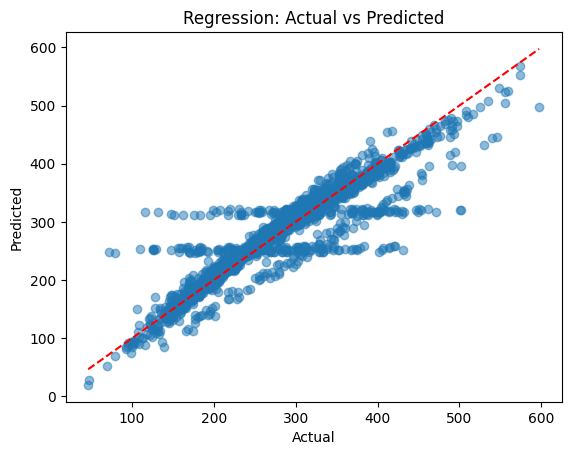

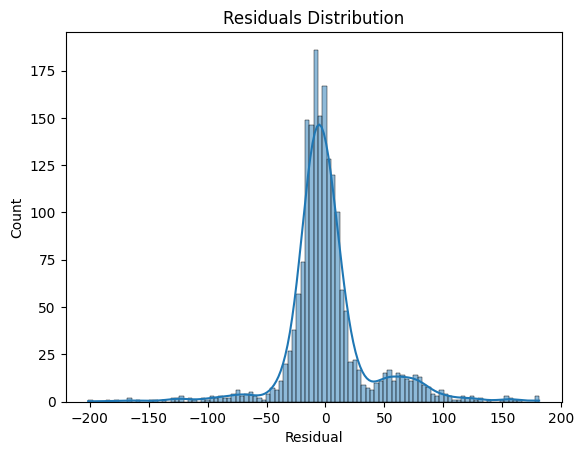

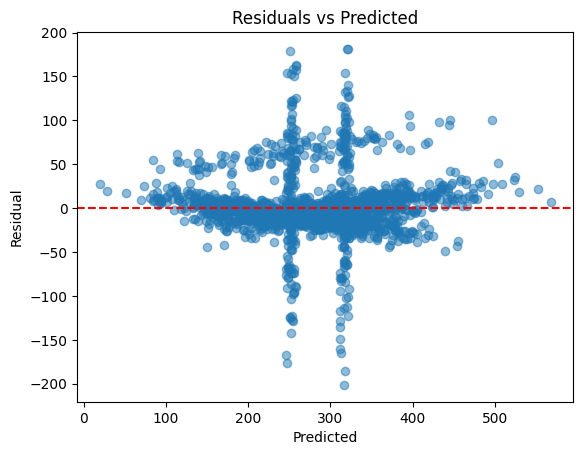

,Feature,Coefficient
0,Sales_Before,68.766815
3,Group_Control,-32.405444
4,Group_Treatment,32.405444
6,Customer_Segment_Low Value,-3.469045
5,Customer_Segment_High Value,3.152171
1,Customer_Satisfaction_Before,1.366964
7,Customer_Segment_Medium Value,0.316873
2,Customer_Satisfaction_After,-0.208861
9,Purchase_Made_Yes,-0.112612
8,Purchase_Made_No,0.112612


In [33]:
# linear regression
LR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

=== Regression Report ===
RMSE: 41.100511779251605
R²: 0.747515682166253


,Feature,Importance
0,Sales_Before,0.683466
3,Group_Control,0.088466
1,Customer_Satisfaction_Before,0.070675
2,Customer_Satisfaction_After,0.061911
4,Group_Treatment,0.055198
5,Group_Unknown,0.007715
10,Purchase_Made_No,0.006000
12,Purchase_Made_Yes,0.005931
6,Customer_Segment_High Value,0.004671
9,Customer_Segment_Unknown,0.004557


/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_22909/472445898.py:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


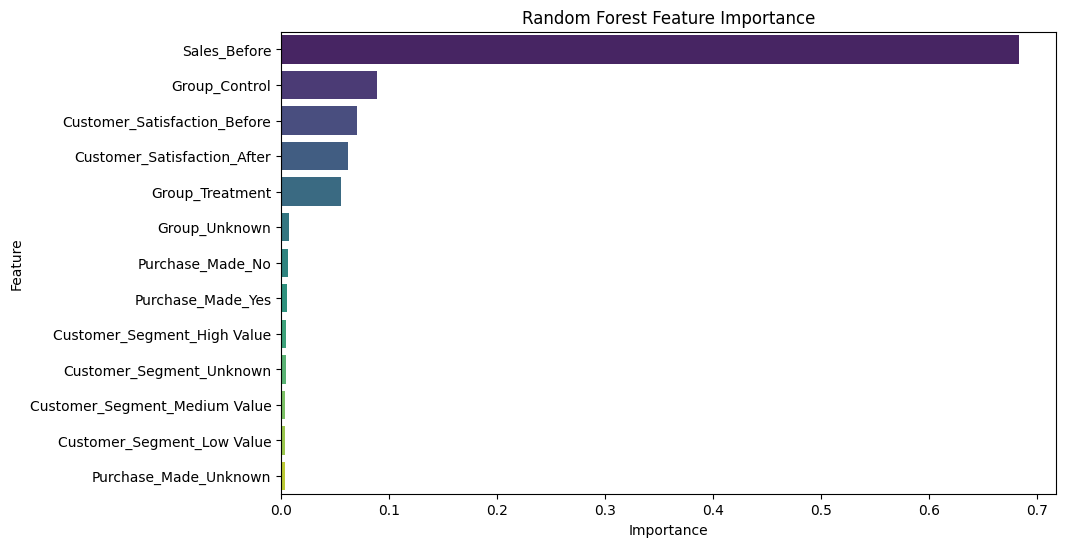

In [69]:
# random forest regressor
RFR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

**Notes**:

- *Sales Before Intervention* is a **key feature** in predicting *Sales After Intervention*; for every unit increase in *Sales Before Intervention*, *Sales After Intervention* increases by approximately 68.76 units.

- All other features are either weak or had no impact in predicting *Sales After Intervention*; some features that had mild impact are the following: *Treatment Group*, *Customer Satisfaction Before Intervention*, *Control Group*, and *Customer Satisfaction After Intervention*.

## Satisfaction (Continuous Numerical Variable)

In [35]:
target = 'Customer_Satisfaction_After'

In [36]:
# get train-test split
X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars = splitData(target)

=== Regression Report ===
RMSE: 11.181580766069896
R²: 0.6193978036907104


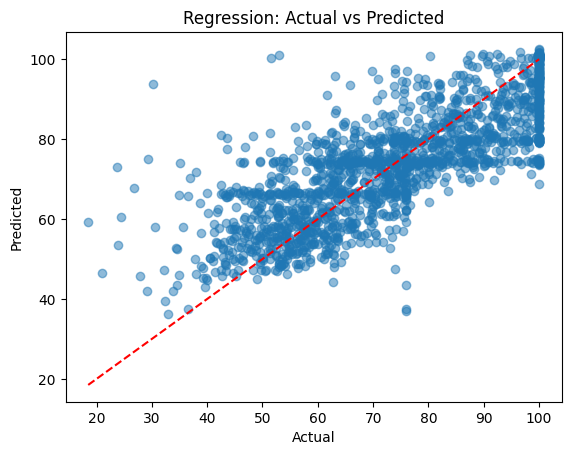

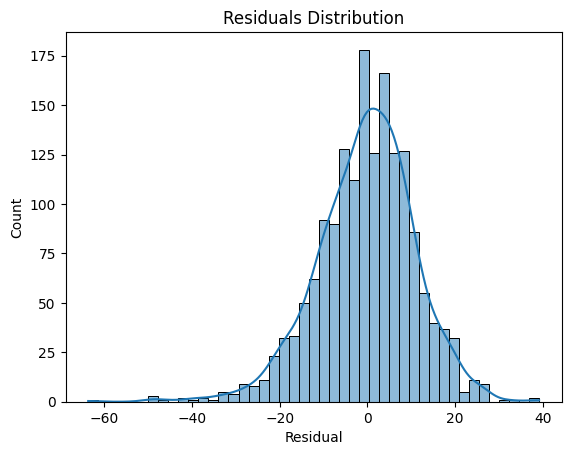

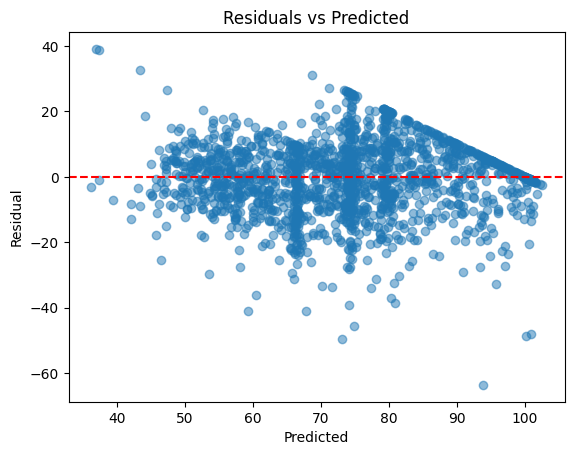

,Feature,Coefficient
2,Customer_Satisfaction_Before,10.637332
6,Customer_Segment_Low Value,-6.956354
5,Customer_Segment_High Value,6.152280
7,Customer_Segment_Medium Value,0.804074
0,Sales_Before,0.667225
1,Sales_After,-0.368118
9,Purchase_Made_Yes,0.229671
8,Purchase_Made_No,-0.229671
3,Group_Control,-0.223806
4,Group_Treatment,0.223806


In [37]:
# linear regression
LR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

=== Regression Report ===
RMSE: 11.12180772910715
R²: 0.6234560747529094


,Feature,Importance
2,Customer_Satisfaction_Before,0.681072
1,Sales_After,0.113872
0,Sales_Before,0.101695
6,Customer_Segment_Low Value,0.050751
5,Customer_Segment_High Value,0.014915
7,Customer_Segment_Medium Value,0.013546
9,Purchase_Made_Yes,0.007246
8,Purchase_Made_No,0.006779
4,Group_Treatment,0.005085
3,Group_Control,0.005039


/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_22909/1840351339.py:286: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


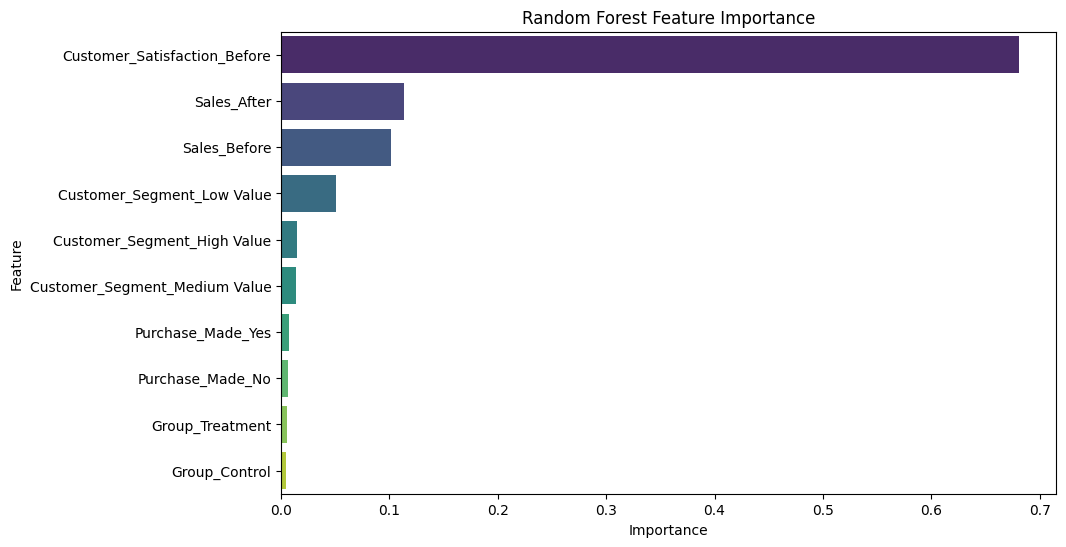

In [38]:
RFR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

**Notes**:

- *Customer Satisfaction Before Intervention* is a **key feature** in predicting *Customer Satisfaction After Intervention*; for every unit increase in *Customer Satisfaction Before Intervention*, *Customer Satisfaction After Intervention* increases by approximately 10.64 units.

- All other features are either weak or had no impact in predicting *Customer Satisfaction After Intervention*; some features that had mild impact are the following: *Sales After Intervention*, *Sales Before Intervention*, *Low Value Customer Segment*.

## Purchase (Categorical Variable)

In [70]:
target = 'Purchase_Made'

In [71]:
# get train-test split
X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars = splitData(target)

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.51      0.33      0.40       906
         Yes       0.52      0.70      0.60       933

    accuracy                           0.52      1839
   macro avg       0.52      0.51      0.50      1839
weighted avg       0.52      0.52      0.50      1839



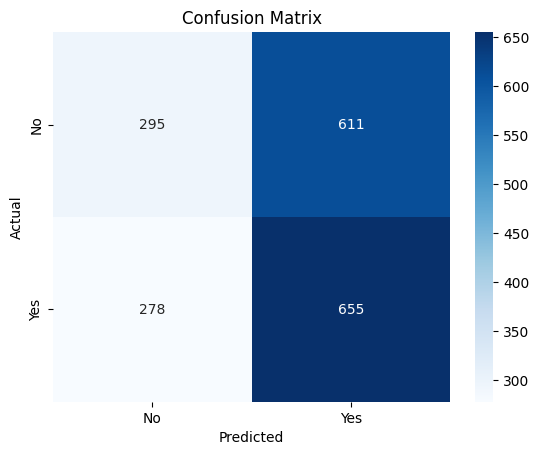

,Feature,Coefficient
0,Sales_Before,-0.011443
1,Sales_After,-0.000566
2,Customer_Satisfaction_Before,0.004156
3,Customer_Satisfaction_After,0.023495
4,Group_Control,0.008632
5,Group_Treatment,0.000965
6,Customer_Segment_High Value,-0.012055
7,Customer_Segment_Low Value,0.069958
8,Customer_Segment_Medium Value,-0.048306


In [41]:
# logistic regression
LOR(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.46      0.51      0.48       906
     Unknown       0.20      0.02      0.04       161
         Yes       0.46      0.49      0.47       933

    accuracy                           0.46      2000
   macro avg       0.38      0.34      0.33      2000
weighted avg       0.44      0.46      0.44      2000



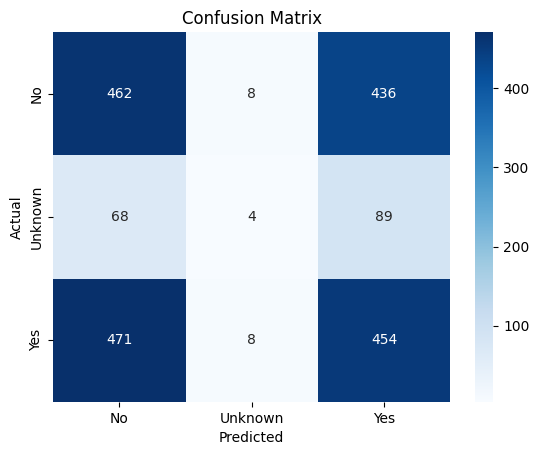

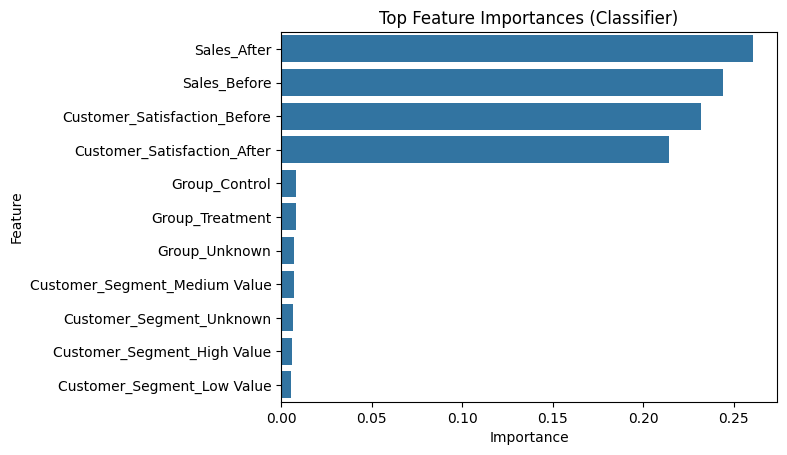

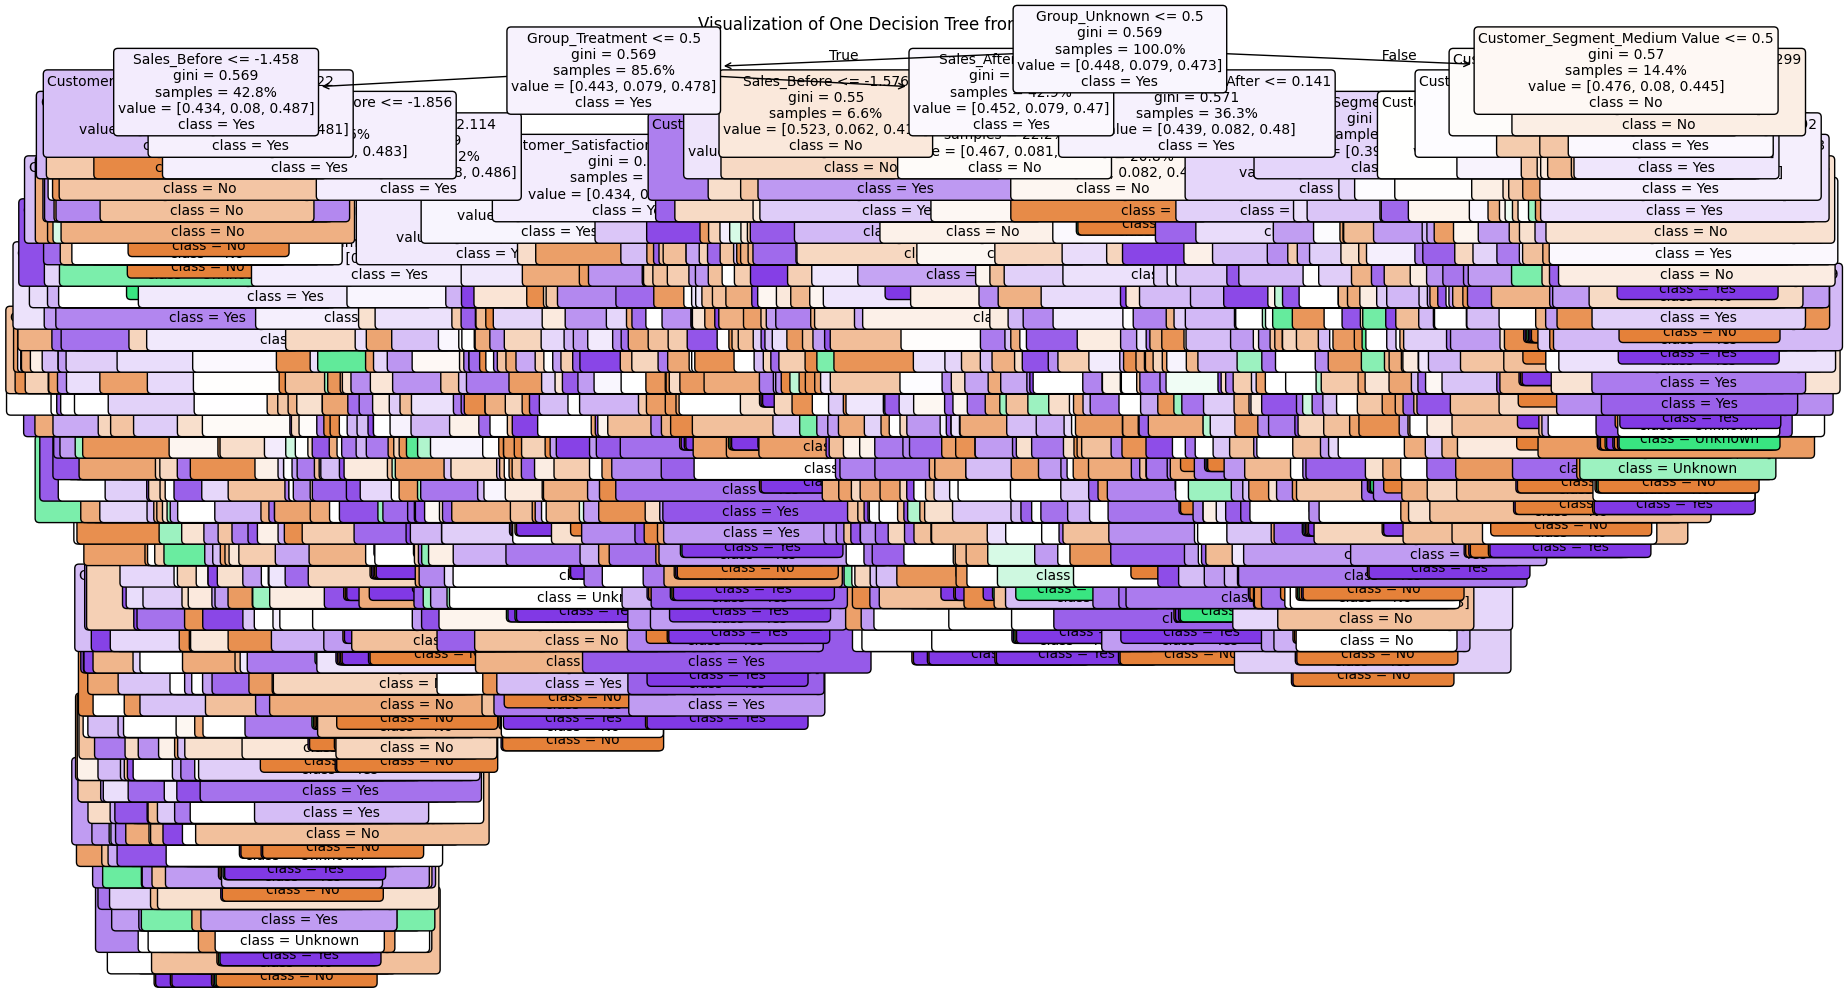

In [76]:
# random forest classifier
RFC(X_tr, X_ts, y_tr, y_ts, num_vars, cat_vars)

- **Notes**

    - Features are weakly or not predictive of *Purchase Made*.

    - Random Forest points to some predictors that may be important: *Sales After Intervention*, *Sales Before Intervention*, *Customer Satisfaction Before Intervention*, *Customer Satisfaction After Intervention* 

# Bonus Analysis: Hypothesis Testing

In [43]:
num_vars = ['Sales_Before',
            'Sales_After',
            'Customer_Satisfaction_Before',
            'Customer_Satisfaction_After']
cat_vars = ['Group',
            'Customer_Segment',
            'Purchase_Made']

In [44]:
# imputate missing values
df[num_vars] = df[num_vars].apply(lambda x: x.fillna(x.median()))
df[cat_vars] = df[cat_vars].apply(lambda x: x.fillna('Unknown'))

## Hypothesis Test for Sales Before and After

$H_0: \mu_{Sales Before} = \mu_{Sales After}$

$H_1:  \mu_{Sales Before} ≠ \mu_{Sales After}$

In [45]:
t, p = ttest_rel(df["Sales_After"], df["Sales_Before"])
print(f"Paired t-test (Sales After vs Before):\nt = {t:.3f}\np = {p:.3e}")

Paired t-test (Sales After vs Before):
t = 145.768
p = 0.000e+00


$H_0: \mu_{Sales Before} = \mu_{Sales After}$

$H_1:  \mu_{Sales Before} < \mu_{Sales After}$

In [46]:
if t > 0:
    p_one_sided = p / 2
else:
    p_one_sided = 1 - (p / 2)

print(f"One-sided t-test (Sales After > Sales Before):\nt={t:.3f}\np={p_one_sided:.3e}")

One-sided t-test (Sales After > Sales Before):
t=145.768
p=0.000e+00


## Hypothesis Test for Customer Satisfaction Before and After

$H_0: \mu_{Satisfaction Before} = \mu_{Satisfaction After}$

$H_1:  \mu_{Satisfaction Before} ≠ \mu_{Satisfaction After}$

In [47]:
t, p = ttest_rel(df["Customer_Satisfaction_After"], df["Customer_Satisfaction_Before"])
print(f"Paired t-test (Satisfaction After vs Before):\nt = {t:.3f}\np = {p:.3e}")

Paired t-test (Satisfaction After vs Before):
t = 29.674
p = 1.550e-185


$H_0: \mu_{Satisfaction Before} = \mu_{Satisfaction After}$

$H_1:  \mu_{Satisfaction Before} < \mu_{Satisfaction After}$

In [48]:
if t > 0:
    p_one_sided = p / 2
else:
    p_one_sided = 1 - (p / 2)

print(f"One-sided t-test (Satisfaction After > Satisfaction Before):\nt={t:.3f}\np={p_one_sided:.3e}")

One-sided t-test (Satisfaction After > Satisfaction Before):
t=29.674
p=7.750e-186


**NOTES**:

- After hypothesis testing, holding for significance level ($\alpha = 0.05$), we make the following statements:

    - For *Sales*, we reject the null hypothesis. There is enough evidence to conclude that *mean sales after the intervention* is **greater** than *mean sales before the intervention*.

    - For *Customer Satisfaction*, we reject the null hypothesis. There is enough evidence to conclude that *mean customer satisfaction after the intervention* is **greater** than *mean customer satisfaction before the intervention*.

# Bonus Analysis: Difference-in-Differences (DiD)

$DiD = (After_{treatment} - Before_{treatment}) - (After_{control} - Before_{control})$

i.e. compare change in treatment vs control groups, specifically change over time.

Key Term: `Group[T.Treatment]:Time` (DiD Effect)

In [49]:
## Sales
# reshape into long format for DiD
df_long_sales = pd.melt(df,
                        id_vars = ["Group", 'Customer_Segment'],
                        value_vars = ["Sales_Before", "Sales_After"],
                        var_name = "Time",
                        value_name = "Sales")

df_long_sales["Time"] = df_long_sales["Time"].map(
    {"Sales_Before": 0, "Sales_After": 1}
)

# DiD model
model_sales = smf.ols("Sales ~ Group * Time",
                      data = df_long_sales).fit()
model_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:58:01   Log-Likelihood:            -1.1174e+05
No. Observations:               20000   AIC:                         2.235e+05
Df Residuals:                   19994   BIC:                         2.235e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 203.4352      0.985    206.538      0.000     201.505     205.366
Group[T.Treatment]          0.9050      1.393      0.650      0.516      -1.825       3.636
Group[T.Unknown]           -1.1929      1.987     -0.600      0.548      -5.087       2.702
Time                       42.2274      1.393     30.315      0.000      39.497      44.958
Group[T.Treatment]:Time    68.1666      1.970     34.601      0.000      64.305      72.028
Group[T.Unknown]:Time      33.5935      2.810     11.955      0.000      28.086      39.101
==============================================================================
Omnibus:                     1032.386   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2286.655
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       4.510   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
## Satisfaction
# reshape into long format for DiD
df_long_sat = pd.melt(df,
                        id_vars = ["Group", 'Customer_Segment'],
                        value_vars = ["Customer_Satisfaction_Before", "Customer_Satisfaction_After"],
                        var_name = "Time",
                        value_name = "Satisfaction")

df_long_sat["Time"] = df_long_sat["Time"].map(
    {"Customer_Satisfaction_Before": 0, "Customer_Satisfaction_After": 1}
)

# DiD model
model_sat = smf.ols("Satisfaction  ~ Group * Time",
                      data = df_long_sat).fit()
model_sat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           2.86e-57
Time:                        13:58:01   Log-Likelihood:                -83873.
No. Observations:               20000   AIC:                         1.678e+05
Df Residuals:                   19994   BIC:                         1.678e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  70.3804      0.245    287.793      0.000      69.901      70.860
Group[T.Treatment]         -0.4650      0.346     -1.345      0.179      -1.143       0.213
Group[T.Unknown]           -0.3966      0.493     -0.804      0.421      -1.364       0.570
Time                        3.7483      0.346     10.838      0.000       3.070       4.426
Group[T.Treatment]:Time     0.0554      0.489      0.113      0.910      -0.903       1.014
Group[T.Unknown]:Time      -0.2073      0.698     -0.297      0.766      -1.575       1.160
==============================================================================
Omnibus:                      373.556   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.771
Skew:                           0.003   Prob(JB):                     3.42e-45
Kurtosis:                       2.504   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_22909/1184894880.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=sales_summary,


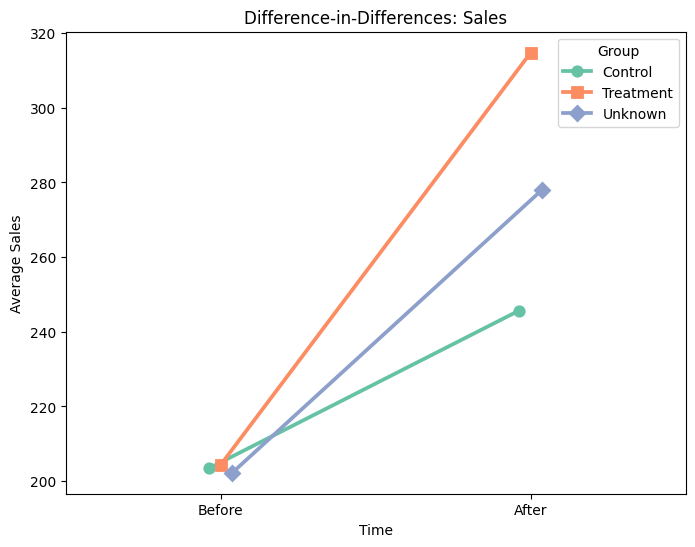

In [51]:
# Sales DiD Visualization
sales_summary = df_long_sales.groupby(["Group", "Time"])["Sales"].agg(["mean", "sem"]).reset_index()

plt.figure(figsize=(8,6))
sns.pointplot(data=sales_summary, 
              x="Time", 
              y="mean",
              hue="Group",
              dodge=True, 
              markers=["o", "s", "D"], 
              capsize=.1, 
              errwidth=1.5, 
              palette="Set2")
plt.xticks([0,1], ["Before", "After"])
plt.title("Difference-in-Differences: Sales")
plt.ylabel("Average Sales")
plt.xlabel("Time")
plt.show()

/var/folders/x8/_2v65kgx1zxc0k4y6d9hts5h0000gn/T/ipykernel_22909/3043657396.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=sat_summary,


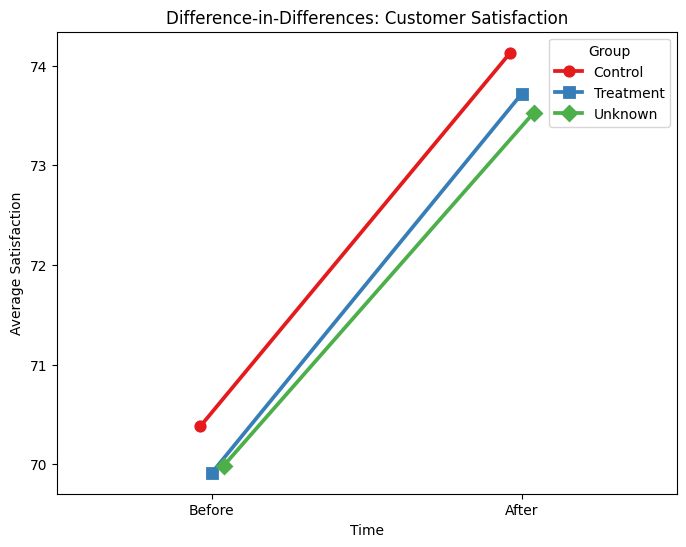

In [52]:
# Satisfaction DiD
sat_summary = df_long_sat.groupby(["Group", "Time"])["Satisfaction"].agg(["mean", "sem"]).reset_index()

plt.figure(figsize=(8,6))
sns.pointplot(data=sat_summary, 
              x="Time",
              y="mean", 
              hue="Group",
              dodge=True, 
              markers=["o", "s", "D"], 
              capsize=.1, 
              errwidth=1.5, 
              palette="Set1")
plt.xticks([0,1], ["Before", "After"])
plt.title("Difference-in-Differences: Customer Satisfaction")
plt.ylabel("Average Satisfaction")
plt.xlabel("Time")
plt.show()

**Notes**:

- Intervention did increase *Sales*, but NOT *Customer Satisfaction*.

    - P-value significant for *Sales*, but NOT for *Customer Satisfaction*

    - Treatment DiD line diverges from Control DiD line for *Sales*

    - Treament DiD line is parallel to Control DiD line for *Customer Satisfaction* (i.e. no intervention effect; groups changed equally)